### Final Module
# Classifier Model
#### Using Different Supervised Algorithm

---

<br>
We have Implemented --

* <strong>Random Forest</strong> 
* Basic Comparation with Other Models


In [39]:
# Importing the libraries
import pandas as pd
import ModelAuto as ma
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
# Models
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Getting the data
data = pd.read_csv(r"C:\Users\intel\Desktop\Sudhanshu\Music Rec\Dataset\Analysed.csv",nrows=100000)

In [4]:
data.shape

(100000, 20)

We are not concedring membership_days registration_day expiration_date <br>expiration_year, expiration_month, expiration_day <br>

Since they are not imp aspect for recomending songs, while registration_year <br> and registration_month could help inunderstanding the period of songs heard

In [5]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [6]:
for col in data.select_dtypes(include=['category']).columns:
    data[col] = data[col].cat.codes

In [7]:
Y = data['target']
data = data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,14,15]]

In [8]:
data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,bd,registration_year,registration_month
0,1647,6022,2,6,6,206471.0,94,401,1598,2821,52.0,0,2012,1
1,3471,18027,4,7,5,284584.0,28,3806,7063,2821,52.0,24,2011,5
2,3471,9744,4,7,5,225396.0,28,2576,5156,2821,52.0,24,2011,5
3,3471,1868,4,7,5,255512.0,1,3266,4209,2821,-1.0,24,2011,5
4,1647,2688,2,6,6,187802.0,0,560,973,2821,52.0,0,2012,1


## Normalization

In [9]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(data)

In [11]:
df =  pd.DataFrame(norm,columns=list(data.columns))

## Creating Train Test

In [12]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(df,Y,test_size=0.2,random_state=0)

In [13]:
xtrain.shape,xtest.shape

((80000, 14), (20000, 14))

## Selecting Features(ensamble Method)

Feature Analysing...

Selected More than features avalable !!!


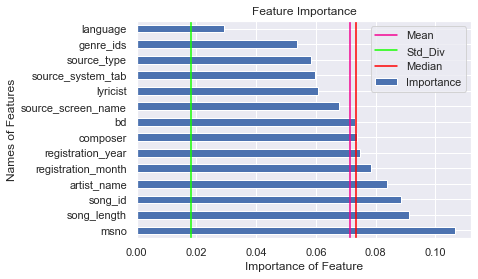



  Max Score     : 0.10668602574098864
  Min Score     : 0.029347336155320737
  Average Score : 0.07142857142857142
  
  


In [16]:
feat = ma.Feature_Importence(xtrain,ytrain,15)

As we can see <strong>language has a very less importence</strong> <br> 
as seen in the <strong> Analysis Module </strong>. <br>
So we will choose top 13 features (Above 0.05)

In [19]:
feat = ma.Feature_Importence(xtrain,ytrain,13,plot=False)

Feature Analysing...


  Max Score     : 0.10665750076269927
  Min Score     : 0.028897144815940426
  Average Score : 0.07142857142857142
  
  


In [20]:
feat.head()

,genre_ids,source_system_tab,source_screen_name,source_type,song_length,song_id,artist_name,composer,lyricist,msno,bd,registration_year,registration_month
10382,0.59,0.5,0.388889,0.454545,0.063805,0.760059,0.942382,0.704961,0.491207,0.434151,0.040075,1.000000,0.272727
73171,0.59,0.5,0.388889,0.363636,0.070862,0.079751,0.830298,0.704961,0.491207,0.859264,0.040075,0.750000,0.090909
30938,0.59,0.5,0.388889,0.363636,0.076856,0.661806,0.833275,0.863060,0.643044,0.241769,0.066170,0.750000,0.181818
99310,0.59,0.5,0.388889,0.363636,0.055703,0.684916,0.959370,0.958878,0.750479,0.721272,0.040075,0.833333,0.000000
58959,0.53,0.5,0.388889,0.363636,0.060528,0.690006,0.050438,0.433676,0.491207,0.408812,0.055918,0.916667,0.090909


In [24]:
xtrain = xtrain[feat.columns]
xtest  = xtest[feat.columns]

## Base Models - Performence Comp

Classification Model Selection...
LOGISTIC REGRESSIN...

ACCURACY :  0.74915

KNN...

ACCURACY :  0.7814

SVM_LINEAR...

ACCURACY :  0.75165

SVM_NonLinear...

ACCURACY :  0.7712

Decision Tree...

ACCURACY :  0.7892

RANDOM FOREST...

ACCURACY :  0.8315


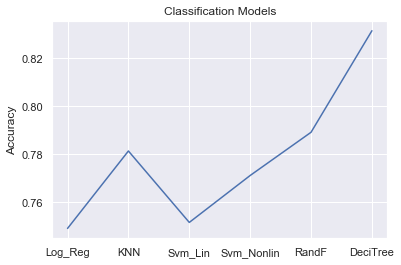

In [21]:
base_model = ma.ModelSelection.Classi_model(xtrain,xtest,ytrain,ytest)

In [43]:
regressor_rf = RandomForestClassifier(n_estimators = 100,random_state = 0,criterion = 'entropy')
regressor_rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
y_pred=regressor_rf.predict(xtest)
y_pred_rf=accuracy_score(ytest,y_pred)
print('ACCURACY : ',y_pred_rf)

ACCURACY :  0.8322


# Based Model OF Random Forest Classifier

### Accurecy : 0.8322 %